In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from hmmlearn import hmm

In [2]:
spy = pd.read_csv("../Data/spy_data.csv")

In [3]:
spy

,Date,Open,High,Low,Close,Adj Close,Volume,Close-Open,High-Low
0,1993-01-29,43.968750,43.968750,43.750000,43.937500,25.547979,1003200,-0.031250,0.218750
1,1993-02-01,43.968750,44.250000,43.968750,44.250000,25.729681,480500,0.281250,0.281250
2,1993-02-02,44.218750,44.375000,44.125000,44.343750,25.784195,201300,0.125000,0.250000
3,1993-02-03,44.406250,44.843750,44.375000,44.812500,26.056761,529400,0.406250,0.468750
4,1993-02-04,44.968750,45.093750,44.468750,45.000000,26.165781,531500,0.031250,0.625000
...,...,...,...,...,...,...,...,...,...
7338,2022-03-21,444.339996,446.459991,440.679993,444.390015,444.390015,88349800,0.050018,5.779999
7339,2022-03-22,445.859985,450.579987,445.859985,449.589996,449.589996,74650400,3.730011,4.720001
7340,2022-03-23,446.910004,448.489990,443.709991,443.799988,443.799988,79426100,-3.110016,4.779999
7341,2022-03-24,445.940002,450.500000,444.760010,450.489990,450.489990,64736900,4.549988,5.739990


In [70]:
ret = spy[["Adj Close"]].pct_change()[1:]

In [72]:
mod = hmm.GaussianHMM(n_components=3, covariance_type="full", n_iter=1000).fit(ret)

In [75]:
mod.predict_proba(ret)

array([[1.00000000e+000, 1.64035404e-020, 4.33784930e-101],
       [9.94751120e-001, 5.24881643e-003, 6.36689974e-008],
       [9.84352964e-001, 1.56453877e-002, 1.64798109e-006],
       ...,
       [1.54152471e-002, 9.81056371e-001, 3.52838201e-003],
       [2.87431603e-002, 9.66173283e-001, 5.08355660e-003],
       [7.87238998e-002, 9.14092941e-001, 7.18315870e-003]])

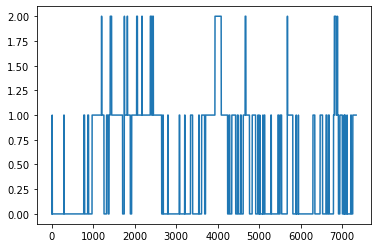

In [74]:
plt.plot(mod.predict(ret))

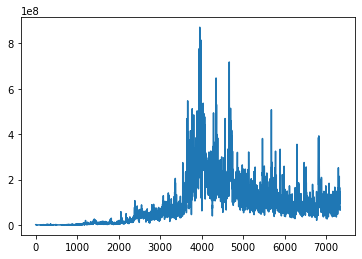

In [79]:
plt.plot(spy["Volume"])